Load the Flights Dataset

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

flights = pd.read_csv('flights.csv')
flights.head()

,Month,Day,Weekday,Airline,Origin,Dest,AirTime,Distance,ArrivalDelay,Diverted,Cancelled
0,1,1,4,WN,LAX,SLC,94.0,590,65.0,0,0
1,1,1,4,UA,DEN,IAD,154.0,1452,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,85.0,641,35.0,0,0
3,1,1,4,AA,DFW,DCA,126.0,1192,-7.0,0,0
4,1,1,4,WN,LAX,MCI,166.0,1363,39.0,0,0


**1**. Find the month and day in which the longest arrival delay occurred.

In [9]:
longest = flights['ArrivalDelay'].max()
print(longest)

flights[['Month','Day','ArrivalDelay']][flights['ArrivalDelay']==longest]

1185.0


,Month,Day,ArrivalDelay
58188,12,30,1185.0


**2**. Find the three airlines with the longest arrival delays.

1st airlines with the longest arrival delays :UA
2nd airlines with the longest arrival delays :WN
3rd airlines with the longest arrival delays :OO


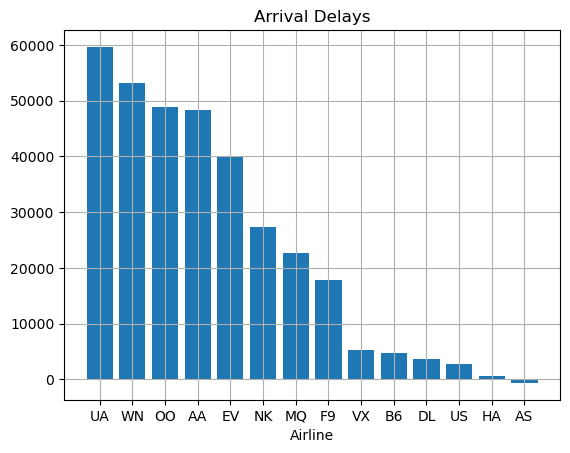

In [91]:
group_flight= flights.groupby(['Airline'])['ArrivalDelay'].sum()
sort_flight = group_flight.sort_values(ascending = False)
i=1

def rank_suffix(i):
    if i == 1:
        return 'st'
    elif i == 2:
        return 'nd'
    elif i == 3:
        return 'rd'
    else:
        return 'th'
plt.title("Arrival Delays")
plt.xlabel("Airline")
plt.bar(sort_flight.keys(), sort_flight)
plt.grid()

for airline, delay in sort_flight[:3].items():
    suffix = rank_suffix(i)
    print(f'{i}{suffix} airlines with the longest arrival delays :{airline}')
    i+=1

**3**. Find the three airlines with the highest number of cancelled or diverted flights.

1st airlines with the highest numbser of cancelled or diverted flights :AA
2nd airlines with the highest numbser of cancelled or diverted flights :OO
3rd airlines with the highest numbser of cancelled or diverted flights :EV


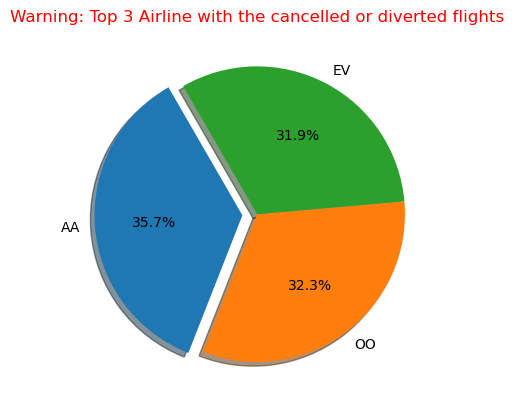

In [96]:
flights['CancelorDivert'] = flights['Cancelled'] + flights['Diverted']
group_flight_cd = flights.groupby(['Airline'])['CancelorDivert'].sum()
group_flight_cd = group_flight_cd.sort_values(ascending=False)
group_flight_cd = group_flight_cd[:3]
i = 1 
for airline, cd in group_flight_cd.items():
    suffix = rank_suffix(i)
    print(f'{i}{suffix} airlines with the highest numbser of cancelled or diverted flights :{airline}')
    i += 1
    
plt.pie(group_flight_cd, labels = group_flight_cd.keys(), explode = (0.1, 0, 0), shadow=True, autopct = '%1.1f%%', startangle=120)
plt.title('Warning: Top 3 Airline with the cancelled or diverted flights', color = 'r')
plt.show()

**4**. Find the airlines with more than 2% of cancelled flights. For each such airline, print its name
and the precentage of cancelled flights.

In [86]:
df = flights.copy()
df_cancel = df.groupby('Airline')['Cancelled'].sum()
df_total = df.groupby('Airline').size()

rate = df_cancel / df_total * 100
rate = rate.sort_values()

for airline, cancel_rate in rate.items():
    if cancel_rate > 2:
        print(f'Airline {airline} cancel_rate: {cancel_rate:.2f}%')

Airline OO cancel_rate: 2.16%
Airline EV cancel_rate: 2.49%
Airline MQ cancel_rate: 4.38%


**5**. For each origin and destination, find the average and variance of the airtime.

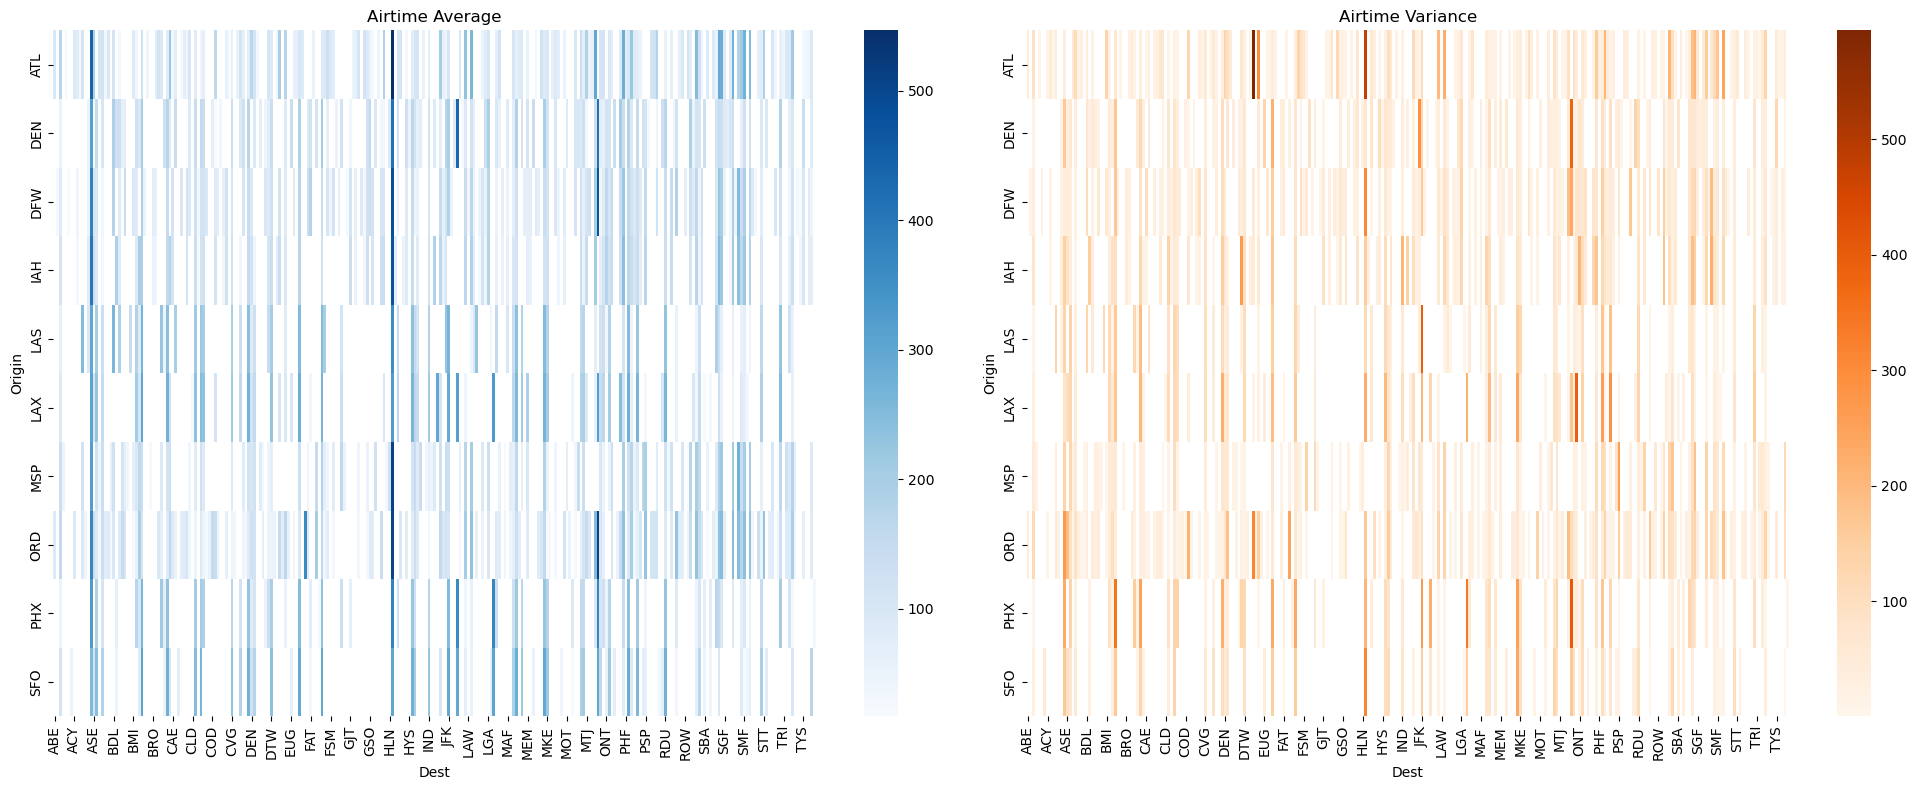

Airtime_average  Airtime_variance
Origin Dest                                   
ATL    ABE         96.387097         45.778495
       ABQ        170.500000         87.866667
       ABY         28.578947          6.590643
       ACY         91.333333         11.466667
       AEX         78.725000         47.332692
...                      ...               ...
SFO    SNA         64.059322         11.338331
       STL        198.900000        101.042105
       SUN         78.000000         25.777778
       TUS        100.200000         35.221053
       XNA        173.500000          0.500000

[1130 rows x 2 columns]

In [100]:
df = flights.copy()
df_average = pd.DataFrame(df.groupby(['Origin','Dest'])['AirTime'].mean())
df_variance = pd.DataFrame(df.groupby(['Origin', 'Dest'])['AirTime'].var())

result = pd.concat([df_average, df_variance], axis=1)
result.columns = ['Airtime_average', 'Airtime_variance']

average_pivot = result['Airtime_average'].unstack()
variance_pivot = result['Airtime_variance'].unstack()

fig, axes = plt.subplots(1, 2, figsize = (20, 8))
sns.heatmap(average_pivot, ax = axes[0], cmap = 'Blues', annot = False)
axes[0].set_title('Airtime Average')
sns.heatmap(variance_pivot, ax = axes[1], cmap = 'Oranges', annot = False)
axes[1].set_title('Airtime Variance')

plt.tight_layout()
plt.show()

result

**6**. Find the airline that makes the most flights between 500 and 1,000 miles.

In [129]:
df = flights.copy()
df_filtered = df[(df['Distance'] <= 1000) & (df['Distance'] >= 500)]

result = df_filtered.groupby('Airline').size()

airline_max = result.idxmax()

print(f'The aireline that makes the most flights between 500 and 1000 miles : {airline_max}')

The aireline that makes the most flights between 500 and 1000 miles : DL


**7**. Create a bar plot showing the number of flights originating from each city.

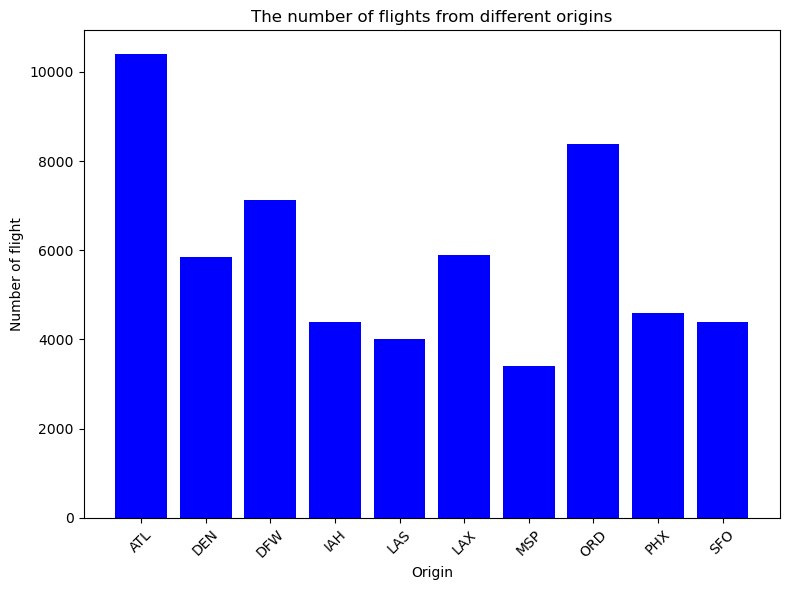

In [102]:
import matplotlib.pyplot as plt
df = flights.copy()
df = df.groupby(['Origin']).size()
plt.figure(figsize=(8,6))    
plt.bar(df.index, df.values, color ='blue')
plt.title('The number of flights from different origins')
plt.ylabel('Number of flight')
plt.xlabel('Origin')
plt.xticks(rotation=45)
plt.tight_layout()

**8**. Change the Weekday column to have the day name instead of day number, e.g. 1 - Sun, 2 - Mon, etc.

In [103]:
df = flights.copy()
df.head()
idx = np.arange(1,8)
value = ['Sun', 'Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat']


df['Weekday'].replace(idx , value, inplace = True)
df['Weekday'].unique()

array(['Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue'], dtype=object)

**9**. Join the Month and Day columns into a single column named Date. For example, if month=3, day=15, the date column should have 3/15.

In [105]:
df = flights.copy()
df['Date'] = df['Month'].astype(str)+'/'+df['Day'].astype(str)
df.insert(2,'Date', df.pop('Date'))
df = df.drop(['Month', 'Day'], axis = 1)
df.head()

,Date,Weekday,Airline,Origin,Dest,AirTime,Distance,ArrivalDelay,Diverted,Cancelled
0,1/1,4,WN,LAX,SLC,94.0,590,65.0,0,0
1,1/1,4,UA,DEN,IAD,154.0,1452,-13.0,0,0
2,1/1,4,MQ,DFW,VPS,85.0,641,35.0,0,0
3,1/1,4,AA,DFW,DCA,126.0,1192,-7.0,0,0
4,1/1,4,WN,LAX,MCI,166.0,1363,39.0,0,0


**10**. Find the longest sequence of on-time flights per airline (an on-time flight is a flight with less than 15 minutes arrival delay). <br> Hint: use the [cumsum()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cumsum.html) function.

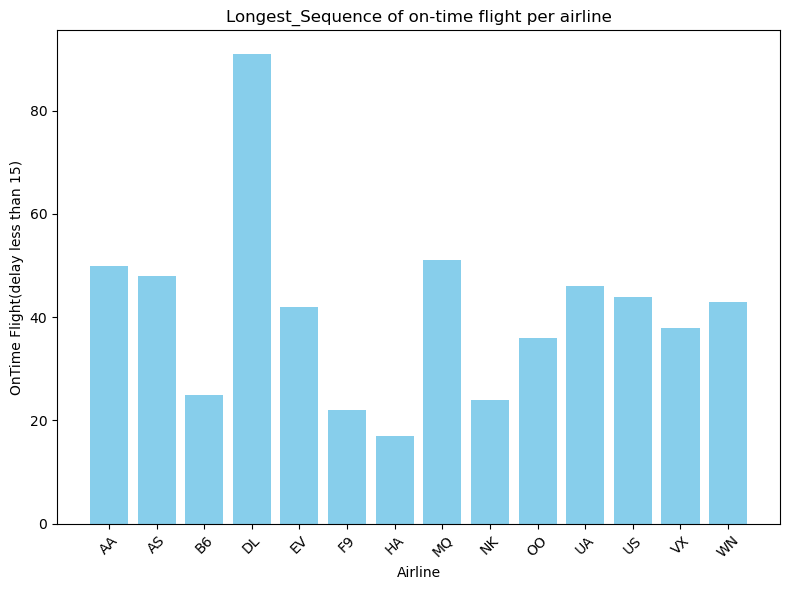

In [107]:
import matplotlib.pyplot as plt

df = flights.copy()
df['OnTime'] = df['ArrivalDelay'] < 15

longest ={}

for airline, group in df.groupby('Airline'):
    group['Change'] = group['OnTime'] != group['OnTime'].shift()
    group['GroupNumber'] = group['Change'].cumsum()
    
    cnt = group[group['OnTime']==True].groupby('GroupNumber').size()
    
    max_idx = cnt.idxmax()
    
    longest[airline] = cnt.get(max_idx, 0)
    
Airline, Longest_Sequence = [],[]

for airline, longest_sequence in longest.items():
    Airline.append(airline)
    Longest_Sequence.append(longest_sequence)

plt.figure(figsize=(8,6))
plt.bar(Airline, Longest_Sequence, color = 'skyblue')
plt.title('Longest_Sequence of on-time flight per airline')
plt.xlabel('Airline')
plt.ylabel('OnTime Flight(delay less than 15)')
plt.xticks(rotation=45)
plt.tight_layout()